In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.metrics import f1_score, accuracy_score, make_scorer, roc_curve, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import pickle

data=pd.read_csv('DIG.csv')
df=data.copy()
df = df.drop(['Unnamed: 0', 'ID'], axis=1)
df.head()

x = df.drop(['STRK'],axis=1)
y=df['STRK']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=30)

#see data if it is balanced 
#hint is not balanced 

#min max scaling 
# compute statistics on training fold for feature rescaling (min-max)
minima = np.min(xtrain, axis=0)
maxima = np.max(xtrain, axis=0)

# rescale train and test sets
xtrain = (xtrain - minima) / (maxima - minima)
xtest = (xtest - minima) / (maxima - minima)
len(xtest)
len(xtrain)

5440

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

w = [ {0:1.0,1:4.0}]
lr_w=LogisticRegression(max_iter=700000)
score_f1_beta = make_scorer(fbeta_score, beta=2)
grid_values_w = {'class_weight':w, 'C':[10000]}
grid_lr_acc_w = GridSearchCV(lr_w, param_grid = grid_values_w, cv=5, verbose=10, n_jobs=-1,  scoring = score_f1_beta )
grid_lr_acc_w.fit(xtrain, ytrain)
grid_lr_acc_w.best_params_
import pickle
filename = 'LOGFinal.sav'
pickle.dump(grid_lr_acc_w, open(filename, 'wb'))
print(f'Best score: {grid_lr_acc_w.best_score_} with param: {grid_lr_acc_w.best_params_}')
#Predict values based on new parameters

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best score: 0.9040707674417586 with param: {'C': 10000, 'class_weight': {0: 1.0, 1: 4.0}}


In [22]:
print(f'Best score: {grid_lr_acc_w.best_score_} with param: {grid_lr_acc_w.best_params_}')
lrgpytest_w= grid_lr_acc_w.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,lrgpytest_w))
print('precision_score\n',precision_score(ytest,lrgpytest_w))
print('recall_score\n',recall_score(ytest,lrgpytest_w))
print('f1_score beta\n',fbeta_score(ytest,lrgpytest_w, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,lrgpytest_w)
grid_lr_acc_pr_sc=precision_score(ytest,lrgpytest_w)
grid_lr_acc_rec_sc=recall_score(ytest,lrgpytest_w)
grid_lr_acc_f1_sc=f1_score(ytest,lrgpytest_w)
confusion_matrix(ytest,lrgpytest_w)

Best score: 0.9040707674417586 with param: {'C': 10000, 'class_weight': {0: 1.0, 1: 4.0}}
accuracy_score
 0.9897058823529412
precision_score
 0.8852459016393442
recall_score
 0.8852459016393442
f1_score beta
 0.8852459016393442


array([[1292,    7],
       [   7,   54]])

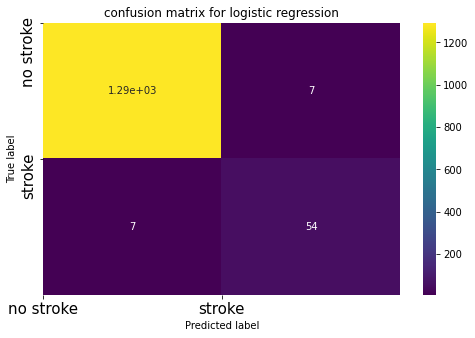

In [7]:
plt.figure(figsize=(8,5))
plt.title('confusion matrix for logistic regression')
sns.heatmap(confusion_matrix(ytest,lrgpytest_w),annot=True,fmt='.3g',cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks([0,1],['no stroke','stroke'],size=15)
plt.xticks([0,1],['no stroke','stroke'],size=15)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
ada_1 = AdaBoostClassifier()
ada_1_params  = {
     "n_estimators":[1000],
    "learning_rate" : [1.5]
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
ada_1_tune = GridSearchCV(estimator = ada_1, param_grid = ada_1_params, scoring = score_f1_beta, cv = 5, return_train_score = True, verbose = 10)
ada_1_tune.fit(xtrain, ytrain)
ada_1_tune.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START learning_rate=1.5, n_estimators=1000........................
[CV 1/5; 1/1] END ......learning_rate=1.5, n_estimators=1000; total time=  12.0s
[CV 2/5; 1/1] START learning_rate=1.5, n_estimators=1000........................
[CV 2/5; 1/1] END ......learning_rate=1.5, n_estimators=1000; total time=  12.0s
[CV 3/5; 1/1] START learning_rate=1.5, n_estimators=1000........................
[CV 3/5; 1/1] END ......learning_rate=1.5, n_estimators=1000; total time=  12.0s
[CV 4/5; 1/1] START learning_rate=1.5, n_estimators=1000........................
[CV 4/5; 1/1] END ......learning_rate=1.5, n_estimators=1000; total time=  12.0s
[CV 5/5; 1/1] START learning_rate=1.5, n_estimators=1000........................
[CV 5/5; 1/1] END ......learning_rate=1.5, n_estimators=1000; total time=  12.0s


{'learning_rate': 1.5, 'n_estimators': 1000}

In [23]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
ada_1_preds = ada_1_tune.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,ada_1_preds))
print('precision_score\n',precision_score(ytest,ada_1_preds))
print('recall_score\n',recall_score(ytest,ada_1_preds))
print('f1_score beta\n',fbeta_score(ytest,ada_1_preds, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,ada_1_preds)
grid_lr_acc_pr_sc=precision_score(ytest,ada_1_preds)
grid_lr_acc_rec_sc=recall_score(ytest,ada_1_preds)
grid_lr_acc_f1_sc=f1_score(ytest,ada_1_preds)
confusion_matrix(ytest,ada_1_preds)

accuracy_score
 0.9823529411764705
precision_score
 0.8627450980392157
recall_score
 0.7213114754098361
f1_score beta
 0.7457627118644069


array([[1292,    7],
       [  17,   44]])

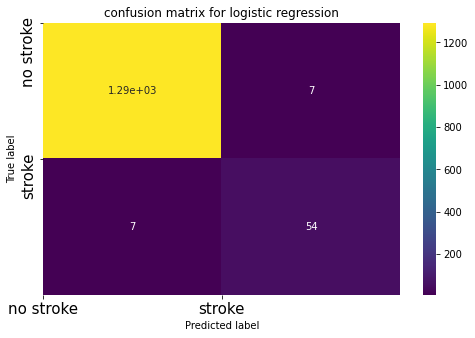

In [10]:
sn.set()
plt.figure(figsize=(8,5))
plt.title('confusion matrix for logistic regression')
sns.heatmap(confusion_matrix(ytest,ada_1_preds),annot=True,fmt='.3g',cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks([0,1],['no stroke','stroke'],size=15)
plt.xticks([0,1],['no stroke','stroke'],size=15)
plt.show()

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, make_scorer
w = [{0:1.0,1:2.0}]
lsvc_params1  = {
    "kernel": ['linear'],
    "C" : [10000],
    'class_weight':w,
    'degree': [2]
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
lsvc1 =SVC()
lsvc_tune1 = GridSearchCV(estimator = lsvc1, param_grid = lsvc_params1, verbose=10, scoring = score_f1_beta, cv = 5, return_train_score = True)
lsvc_tune1.fit(xtrain, ytrain)
lsvc_tune1.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear
[CV 1/5; 1/1] END C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear; total time= 4.7min
[CV 2/5; 1/1] START C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear
[CV 2/5; 1/1] END C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear; total time= 2.9min
[CV 3/5; 1/1] START C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear
[CV 3/5; 1/1] END C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear; total time= 2.5min
[CV 4/5; 1/1] START C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear
[CV 4/5; 1/1] END C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear; total time=  45.1s
[CV 5/5; 1/1] START C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear
[CV 5/5; 1/1] END C=10000, class_weight={0: 1.0, 1: 2.0}, degree=2, kernel=linear; total time= 1.9min


{'C': 10000, 'class_weight': {0: 1.0, 1: 2.0}, 'degree': 2, 'kernel': 'linear'}

In [12]:
import pickle
filename = 'SVCFinal.sav'
pickle.dump(lsvc_tune1, open(filename, 'wb'))
print(f'Best score: {lsvc_tune1.best_score_} with param: {lsvc_tune1.best_params_}')

Best score: 0.9376269735857529 with param: {'C': 10000, 'class_weight': {0: 1.0, 1: 2.0}, 'degree': 2, 'kernel': 'linear'}


In [24]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
scv_1_preds1 = lsvc_tune1.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,scv_1_preds1))
print('precision_score\n',precision_score(ytest,scv_1_preds1))
print('recall_score\n',recall_score(ytest,scv_1_preds1))
print('f1_score beta\n',fbeta_score(ytest,scv_1_preds1, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,scv_1_preds1)
grid_lr_acc_pr_sc=precision_score(ytest,scv_1_preds1)
grid_lr_acc_rec_sc=recall_score(ytest,scv_1_preds1)
grid_lr_acc_f1_sc=f1_score(ytest,scv_1_preds1)
confusion_matrix(ytest,scv_1_preds1)

accuracy_score
 0.9963235294117647
precision_score
 1.0
recall_score
 0.9180327868852459
f1_score beta
 0.9333333333333332


array([[1299,    0],
       [   5,   56]])

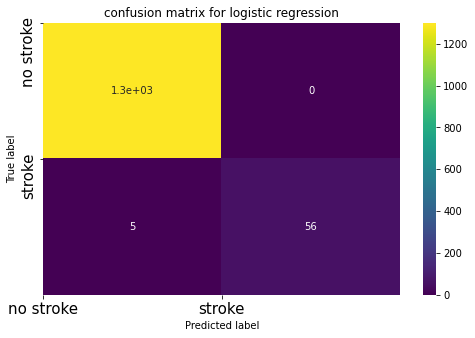

In [16]:
plt.figure(figsize=(8,5))
plt.title('confusion matrix for logistic regression')
sns.heatmap(confusion_matrix(ytest,scv_1_preds1),annot=True,fmt='.3g',cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks([0,1],['no stroke','stroke'],size=15)
plt.xticks([0,1],['no stroke','stroke'],size=15)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
rfc_1 = RandomForestClassifier()
rfc_1_params  = {
    "n_estimators":[100],
    "criterion" : ['entropy'],
    'class_weight': [{0:1.0,1:1.0}]
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
rfc_1_tune = GridSearchCV(estimator = rfc_1, param_grid = rfc_1_params, cv = 5, scoring=score_f1_beta, return_train_score = True, verbose = 10)
rfc_1_tune.fit(xtrain, ytrain)
rfc_1_tune.best_params_
import pickle
filename = 'RFCFinal.sav'
pickle.dump(rfc_1_tune, open(filename, 'wb'))
print(f'Best score: {rfc_1_tune.best_score_} with param: {rfc_1_tune.best_params_}')
#Predict values based on new parameters

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100
[CV 1/5; 1/1] END class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100; total time=   0.9s
[CV 2/5; 1/1] START class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100
[CV 2/5; 1/1] END class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100; total time=   0.9s
[CV 3/5; 1/1] START class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100
[CV 3/5; 1/1] END class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100; total time=   0.9s
[CV 4/5; 1/1] START class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100
[CV 4/5; 1/1] END class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100; total time=   0.9s
[CV 5/5; 1/1] START class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100
[CV 5/5; 1/1] END class_weight={0: 1.0, 1: 1.0}, criterion=entropy, n_estimators=100; 

In [25]:
rfc_1_preds = rfc_1_tune.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,rfc_1_preds))
print('precision_score\n',precision_score(ytest,rfc_1_preds))
print('recall_score\n',recall_score(ytest,rfc_1_preds))
print('f1_score beta\n',fbeta_score(ytest,rfc_1_preds, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,rfc_1_preds)
grid_lr_acc_pr_sc=precision_score(ytest,rfc_1_preds)
grid_lr_acc_rec_sc=recall_score(ytest,rfc_1_preds)
grid_lr_acc_f1_sc=f1_score(ytest,rfc_1_preds)
confusion_matrix(ytest,rfc_1_preds)

accuracy_score
 0.975735294117647
precision_score
 1.0
recall_score
 0.45901639344262296
f1_score beta
 0.5147058823529412


array([[1299,    0],
       [  33,   28]])

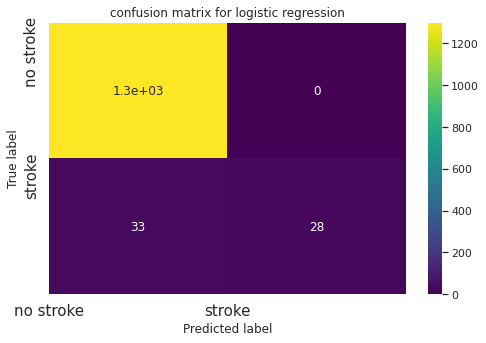

In [20]:
sns.set()
plt.figure(figsize=(8,5))
plt.title('confusion matrix for logistic regression')
sns.heatmap(confusion_matrix(ytest,rfc_1_preds),annot=True,fmt='.3g',cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks([0,1],['no stroke','stroke'],size=15)
plt.xticks([0,1],['no stroke','stroke'],size=15)
plt.show()

In [21]:
from sklearn.neural_network import MLPClassifier
parameter_space = {
    'hidden_layer_sizes': [(50,75,100,)],
    'activation': ['logistic' ],
    'solver': [ 'adam'],
    'alpha': [.00001],
    'learning_rate': ['adaptive'],
}
score_f1_beta = make_scorer(fbeta_score, beta=2)
mlp_gs = MLPClassifier(max_iter=10000)
clf = GridSearchCV(mlp_gs, parameter_space, cv=5, scoring=score_f1_beta, verbose=10)
clf.fit(xtrain, ytrain)
clf.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam
[CV 1/5; 1/1] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam; total time=  20.5s
[CV 2/5; 1/1] START activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam
[CV 2/5; 1/1] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam; total time=  14.0s
[CV 3/5; 1/1] START activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam
[CV 3/5; 1/1] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam; total time=  24.7s
[CV 4/5; 1/1] START activation=logistic, alpha=1e-05, hidden_layer_sizes=(50, 75, 100), learning_rate=adaptive, solver=adam
[CV 4/5; 1/1] END a

{'activation': 'logistic',
 'alpha': 1e-05,
 'hidden_layer_sizes': (50, 75, 100),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [28]:
clf.best_params_

{'activation': 'logistic',
 'alpha': 1e-05,
 'hidden_layer_sizes': (50, 75, 100),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [26]:
clf_preds = clf.predict(xtest)
print('accuracy_score\n',accuracy_score(ytest,clf_preds))
print('precision_score\n',precision_score(ytest,clf_preds))
print('recall_score\n',recall_score(ytest,clf_preds))
print('f1_score beta\n',fbeta_score(ytest,clf_preds, beta=2.0))
grid_lr_acc_acc_sc=accuracy_score(ytest,clf_preds)
grid_lr_acc_pr_sc=precision_score(ytest,clf_preds)
grid_lr_acc_rec_sc=recall_score(ytest,clf_preds)
grid_lr_acc_f1_sc=f1_score(ytest,clf_preds)
confusion_matrix(ytest,clf_preds)

accuracy_score
 0.9911764705882353
precision_score
 0.9454545454545454
recall_score
 0.8524590163934426
f1_score beta
 0.8695652173913044


array([[1296,    3],
       [   9,   52]])

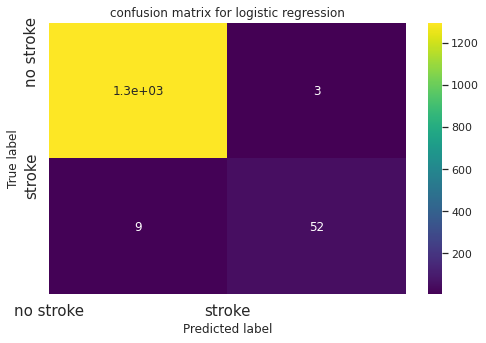

In [27]:
plt.figure(figsize=(8,5))
plt.title('confusion matrix for logistic regression')
sns.heatmap(confusion_matrix(ytest,clf_preds),annot=True,fmt='.3g',cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks([0,1],['no stroke','stroke'],size=15)
plt.xticks([0,1],['no stroke','stroke'],size=15)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
print("AUC_ROC log: ", roc_auc_score(ytest, lrgpytest_w))
print("AUC_ROC ada: ", roc_auc_score(ytest, ada_1_preds))
print("AUC_ROC svc: ", roc_auc_score(ytest, scv_1_preds1))
print("AUC_ROC rfc: ", roc_auc_score(ytest, rfc_1_preds))
print("AUC_ROC mlp: ", roc_auc_score(ytest,clf_preds))

AUC_ROC log:  0.9399285705271394
AUC_ROC ada:  0.8579613574123853
AUC_ROC svc:  0.959016393442623
AUC_ROC rfc:  0.7295081967213115
AUC_ROC mlp:  0.925074773785636
